In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("data/train.csv")

In [31]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [32]:
X = df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [33]:
y = df.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [34]:
df.shape

(20800, 5)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [36]:
df = df.dropna()

In [37]:
df.shape

(18285, 5)

In [38]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [39]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
wordnet = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [40]:
## CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [41]:
X.shape

(18285, 5000)

In [42]:
y = messages['label']

In [43]:

## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [44]:
cv.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [45]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [46]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

# MultinomialNB Algorithm

In [48]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


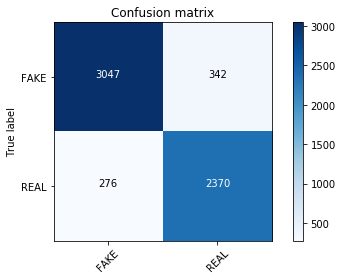

In [49]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [50]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8975973487986744

In [51]:
import pickle

# Save trained model to file
pickle.dump(classifier, open("fake_news_2.pkl", "wb"))

In [52]:
loaded_model = pickle.load(open("fake_news_2.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8975973487986744

In [100]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

news = new_review(str(input("Enter new review...")))
if news[0]==1:
    print("FAKE")
else :
    print("REAL")

Enter new review...Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times
[1]


In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [103]:
from sklearn.metrics import accuracy_score
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9166528583264292

In [106]:
test = pd.read_csv("data/test.csv")
test=test.dropna()
messages=test.copy()
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [107]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
test = cv.fit_transform(corpus).toarray()
test.shape

(4575, 5000)

In [114]:
pred_nbs = linear_clf.predict(test)
np.savetxt("submit.csv", pred_nbs, delimiter=",")
sub_df

ValueError: Length of values does not match length of index